# Author : Aakash Sawant
## GRIP August'21 , The SPARKS Foundation

## TASK 5 : Object Detection / Optical Character Recognition (ORC)

### Character detector which extracts printed or handwritten text from an image

In [30]:
#Importing Libraries
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Loading the Image

In [20]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'


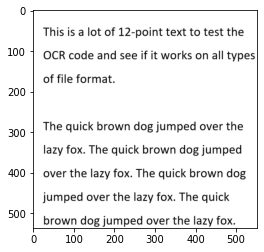

In [32]:
img = cv2.imread("download.png",flags=0)

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_h,img_w,_ = img.shape
plt.imshow(img)

### PreProcessing the Image


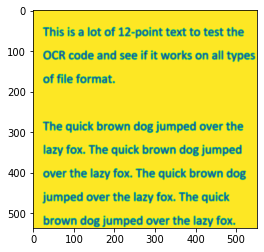

In [33]:
gray = cv2.threshold(img, 0, 255,cv2.THRESH_TOZERO)[1]
imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # CONVERTING IMAGE TO GRAY SCALE
imgBlur = cv2.GaussianBlur(imgGray, (5, 5), 1) # ADDING GAUSSIAN BLUR
plt.imshow(imgBlur)

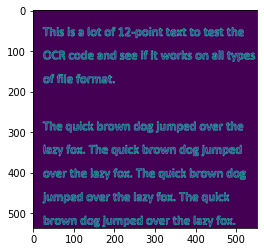

In [34]:
imgThreshold = cv2.Canny(imgBlur,100,0)# APPLYING CANNY BLUR
backup = imgThreshold.copy()
plt.imshow(imgThreshold)

In [35]:
kernel = np.ones((5, 5))
imgDial = cv2.dilate(imgThreshold, kernel, iterations=2) # APPLYING DILATION
imgThreshold = cv2.erode(imgDial, kernel, iterations=1)  # APPLYING EROSION


In [36]:
## FIND ALL COUNTOURS
imgContours = img.copy() # COPYING IMAGE FOR DISPLAY PURPOSES
imgBigContour = img.copy() # COPYING IMAGE FOR DISPLAY PURPOSES
contours, hierarchy = cv2.findContours(imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # FINDING ALL CONTOURS
cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 10) # DRAWING ALL DETECTED CONTOURS

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### Converting Image to Text


Text Version:
 This is a lot of 12-point text to test the
OCR code and see if it works on all types

of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick

brown dog jumped over the lazy fox.


Image:


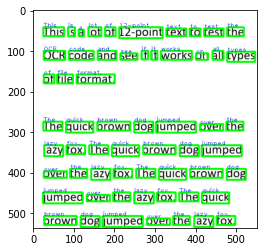

In [37]:

try:
    wordBoxes = pytesseract.image_to_data(imgWarpColored)
    for x,b in enumerate(wordBoxes.splitlines()):
        if x != 0:
            b = b.split()
            if len(b) == 12:
                    x,y,w,h,word = int(b[6]),int(b[7]),int(b[8]),int(b[9]),b[-1]
                    cv2.rectangle(imgWarpColored,(x,y),(w+x,h+y),(0,255,0),3)
                    cv2.putText(imgWarpColored,word,(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),1)

    print("Text Version:\n",pytesseract.image_to_string(imgGray))
    print("\nImage:")
    plt.imshow(cv2.cvtColor(imgWarpColored,cv2.COLOR_RGB2BGR))
    plt.show()
except:
    wordBoxes = pytesseract.image_to_data(imgBlur)
    for x,b in enumerate(wordBoxes.splitlines()):
        if x != 0:
            b = b.split()
            if len(b) == 12:
                x,y,w,h,word = int(b[6]),int(b[7]),int(b[8]),int(b[9]),b[-1]
                cv2.rectangle(img,(x,y),(w+x,h+y),(0,255,0),3)
                cv2.putText(img,word,(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),1)
    print("Text Version:\n",pytesseract.image_to_string(imgBlur))
    print("\nImage:")
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
    plt.show()